In [3]:
from sklearn.neighbors import KernelDensity
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng

In [4]:
rng = default_rng(0)
X, y = make_blobs()

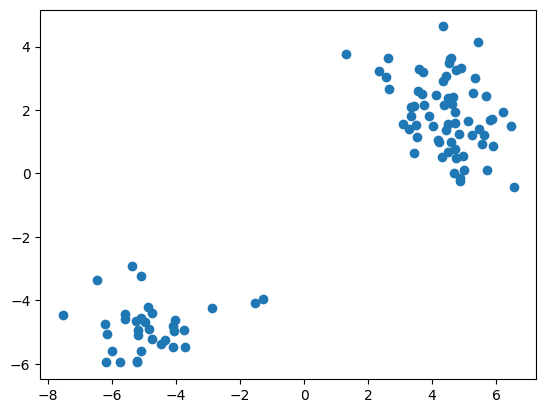

In [5]:
plt.scatter(X[:,0],X[:,1])

In [6]:
kde = KernelDensity().fit(X)
log_density = kde.score_samples(X)

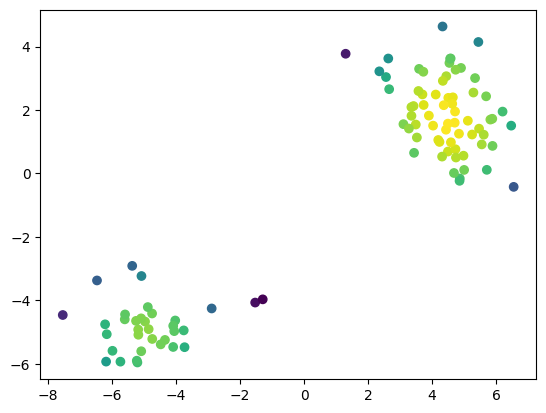

In [8]:
plt.scatter(X[:,0],X[:,1],c=log_density)

In [16]:
threshold = np.percentile(log_density,5)
def foo(X,n,threshold,kde):
    i = 0
    while i < n:
        value = rng.uniform(low=np.min(X,axis=0), high=np.max(X,axis=0),size=X.shape[1])
        if kde.score_samples(value.reshape(1, -1)) < threshold:
            i+=1
            yield value

points = np.array([x for x in foo(X,100,threshold,kde)])


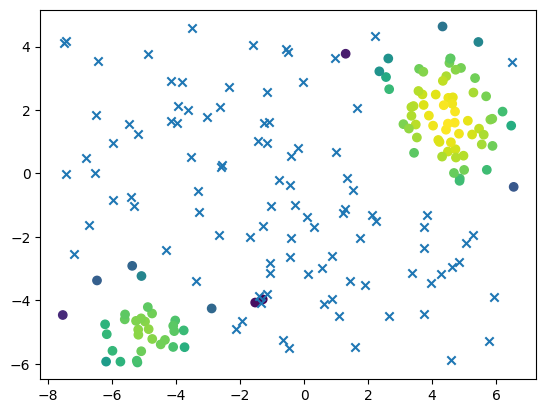

In [17]:
plt.scatter(X[:,0],X[:,1],c=log_density)
plt.scatter(points[:,0],points[:,1],marker='x')